In [1]:
import pandas as pd
%matplotlib inline 

In [2]:
buildings = pd.read_csv('/Users/CHENYX/590DV/building_inventory.csv')

In [3]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided


In [4]:
buildings.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

# Relationship between the year acquired and the year constructed

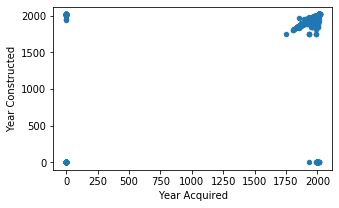

In [5]:
buildings.plot(x='Year Acquired', y='Year Constructed', figsize=(5,3),kind='scatter')

We could clearly notice that there are some "wrong and annoying" zero points.

To drop them, we need to find the min and max value of "Year Acquired" and "Year Constructed"(except 0).

In [6]:
# Find extreme value of "Year Constructed"

Acquired0 = buildings[buildings['Year Acquired'] > 0]
A2 = Acquired0[Acquired0['Year Constructed'] > 0]
A2[['Year Constructed']].min()

Year Constructed    1753
dtype: int64

In [7]:
A2[['Year Constructed']].max()

Year Constructed    2019
dtype: int64

In [8]:
# Find extreme value of "Year Acquired"

Constructed0 = buildings[buildings['Year Constructed'] > 0]
C2 = Constructed0[Constructed0['Year Acquired'] > 0]
C2[['Year Acquired']].min()

Year Acquired    1753
dtype: int64

In [9]:
C2[['Year Acquired']].max()

Year Acquired    2019
dtype: int64

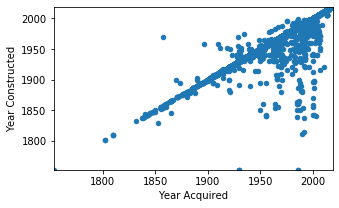

In [10]:
# Now we could get a better plot.

buildings.plot(x='Year Acquired', y='Year Constructed',xlim = (1753,2019), ylim = (1753,2019), figsize=(5,3),kind='scatter')

I successfully removed the 0 value to make the scatter plot representing the relationship of the year looks clearer.

However, there are still some points off the center line. Needs further analysis about the year relationship.

# Total square footage as a function of congressional district

In [11]:
total = buildings.groupby(['Congress Dist','Congressional Full Name'])['Square Footage'].sum().reset_index(name = 'Total Square Footage')
total

,Congress Dist,Congressional Full Name,Total Square Footage
0,1,Bobby L. Rush,2351762
1,2,Robin Kelly,6285684
2,3,Daniel William Lipinski,1293687
3,4,Luis Gutierrez,317741
4,5,Mike Quigley,1809022
5,6,Peter J. Roskam,145659
6,7,Danny K. Davis,9211651
7,8,Tammy Duckworth,1461548
8,9,Janice Schakowsky,77978
9,10,Robert Dold,929267


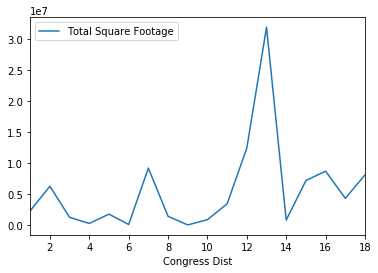

In [12]:
total.plot(x='Congress Dist', y="Total Square Footage")

I successfully calculated the sum square footage and group it by congress district. Line chart connecting values in different districts.We could see that dist 13 has the highest value, and the reason and relationship between each region needs analysis.

# Average square footage per floor as a function of congressional district

In [13]:
total2 = buildings.groupby(['Congress Dist','Congressional Full Name'])['Square Footage','Total Floors'].sum().reset_index()
total2['Average'] = total2['Square Footage']/total2['Total Floors']
total2

,Congress Dist,Congressional Full Name,Square Footage,Total Floors,Average
0,1,Bobby L. Rush,2351762,134,17550.462687
1,2,Robin Kelly,6285684,647,9715.122102
2,3,Daniel William Lipinski,1293687,72,17967.875000
3,4,Luis Gutierrez,317741,21,15130.523810
4,5,Mike Quigley,1809022,113,16009.044248
5,6,Peter J. Roskam,145659,28,5202.107143
6,7,Danny K. Davis,9211651,517,17817.506770
7,8,Tammy Duckworth,1461548,312,4684.448718
8,9,Janice Schakowsky,77978,11,7088.909091
9,10,Robert Dold,929267,213,4362.755869


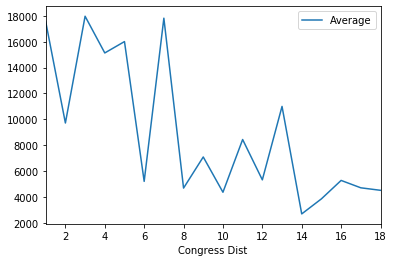

In [14]:
total2.plot(x='Congress Dist', y="Average")

The average value equals total square footage divided by total floors number. We could see that the values obtained in different regions are quite different, but the sum of square footage calculated in pervious question are not so different. So, the difference of total floors number between districts needs attention.